In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate data

In [3]:
X_train = np.linspace(-1,1,20)

In [4]:
X_train

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [5]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [6]:
X_test = np.linspace(-1,1,20)

In [7]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

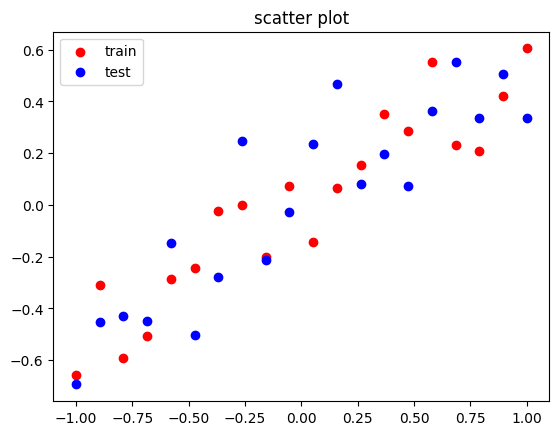

In [8]:
plt.scatter(X_train, y_train, label = 'train', color = 'red')
plt.scatter(X_test, y_test, label = 'test' , color = 'blue')
plt.title("scatter plot")
plt.legend()
plt.show()

- ```amra j data ta generate korlam seta holo ekta liniear data. tai ekhane amake regression apply korte hobe```

# Regression model

In [11]:
model_1 = Sequential()

model_1.add(Dense(128, activation = 'relu',input_dim = 1))
model_1.add(Dense(128, activation = 'relu'))
model_1.add(Dense(1, activation = 'linear'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
adam = Adam(learning_rate = 0.01)
model_1.compile(loss = 'mse', optimizer = adam, metrics = ['mse'])

In [13]:
history = model_1.fit(X_train, y_train, epochs = 500, validation_data = (X_test,y_test), verbose = False)

In [14]:
# Evaluate the model 

# Mainly ekhane amra loss calculate korbo. Dekhbo j model training and test datar upor kmn perform korteche, overfitting hocche kina.

_, train_mse = model_1.evaluate(X_train,y_train, verbose = 0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose = 0)

print("Train = {}, test = {}".format(train_mse, test_mse))

Train = 0.0022709898184984922, test = 0.04752015322446823


- ```Ekhane dekha jacche model_1 training data er upor onek valo perform kortece, loss onek kom, but test datar upor valo perform kortece na, mane loss onek beshi compared to training data. Soja bangla te ekhane overfitting hoyeche.```

In [16]:
y_pred_1 = model_1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


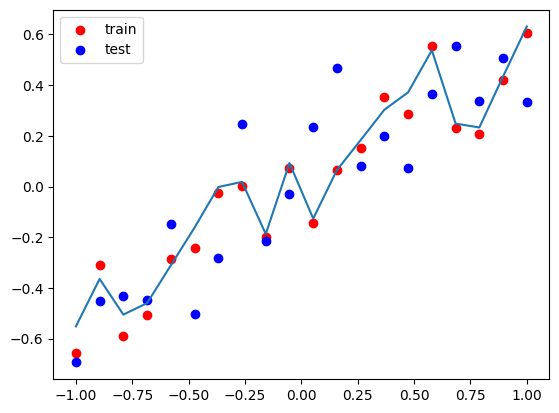

In [17]:
plt.scatter(X_train,y_train, color = 'red', label = 'train')
plt.scatter(X_test, y_test, color = 'blue', label = 'test')
plt.plot(X_test, y_pred_1)

plt.legend()
plt.show()

- ```Clearly dekha jacche ekhane overfitting hocche.```

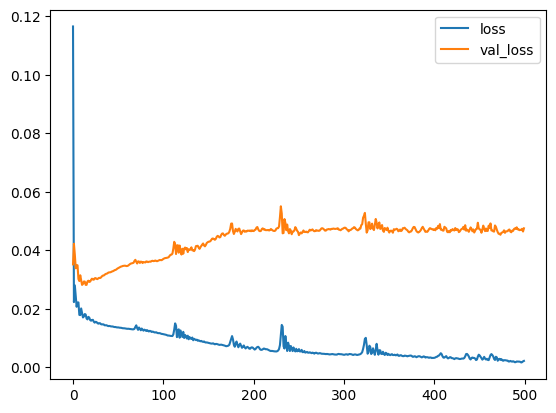

In [19]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')

plt.legend()
plt.show()

- ```Ekhane dekha jacche loss and val_loss er majhe difference onek beshi and seta barteche increasing order e ```

- ```ebar dropout use kore arekta model banabo jeta overfitting handle korte pare```

# Dropout Model 

In [23]:
model_2 = Sequential()

model_2.add(Dense(128, activation = 'relu', input_dim = 1))
model_2.add(Dropout(0.2)) # 20% node switch off kore dilam for each loop.

model_2.add(Dense(128, activation = 'relu'))
model_2.add(Dropout(0.2))

model_2.add(Dense(1, activation = 'linear'))

In [24]:
adam = Adam(learning_rate = 0.01)
model_2.compile(loss = 'mse', optimizer = adam, metrics = ['mse'])

In [25]:
history = model_2.fit(X_train, y_train, epochs = 500, validation_data = (X_test, y_test), verbose = False)

In [26]:
_, train_mse = model_2.evaluate(X_train, y_train, verbose = 0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose = 0)

print('train: {}, test: {}'.format(train_mse, test_mse))

train: 0.01272562611848116, test: 0.040992170572280884


- ```ekhon loss thikthak hoyeche motamoti. balance e chole ashche train and test data er jonno```

In [28]:
y_pred_2 = model_2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


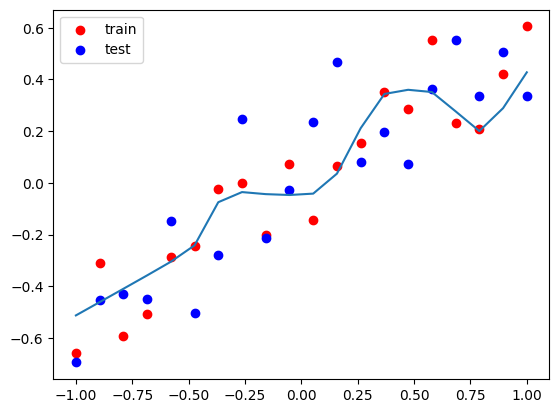

In [29]:
plt.scatter(X_train, y_train, color = 'red', label = 'train')
plt.scatter(X_test, y_test, color = 'blue', label = 'test')
plt.plot(X_test, y_pred_2)

plt.legend()
plt.show()

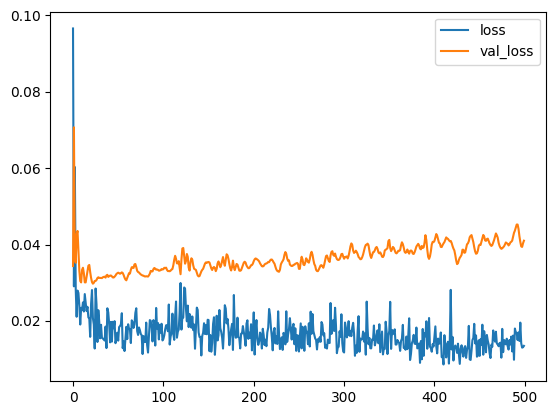

In [30]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')

plt.legend()
plt.show()

- ``` Ekhane dekha jacche loss and val_loss er difference kome geche, mane overfitting handle hoyeche ```